from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

#Overview

For this task same dataset *pendigits* as before was choosen. It is a Pen-Based Recognition of Handwritten Digits Data Set from LIBSVM.

The set is split into two files, learning set of 7,494 samples, and testing one of 3,498 samples. In order to randomize datasets, in this exercise only learning set will be used, and randomly split into new learning and testing set.

There are 10 classes across the dataspace.

------------------------------------------------------------------------

For binary tasks, one of default sets will be used.

#Dataset upload, cross validation, and classifier sellection
1. You must load the machine learning multiclass dataset that you already used in the
Introduction section. You are going to use cross validation to choose a classifier. There
are many kinds of cross validation techniques, so you should consider their advantages
and drawbacks.


In [82]:
#Load dataset
from sklearn import datasets

pendings = datasets.load_svmlight_file('/content/pendigits.txt')
target = pendings[-1]
data = pendings[0].toarray()

In [83]:
#Cross validation
import numpy as np

y = list(target)
classes = np.unique(y)
occur = list()
for c in classes:
    occur.append(y.count(c))
print(occur)

[780, 779, 780, 719, 780, 720, 720, 778, 719, 719]


Given that each class occurs similar number of times in the dataset (occurences: [780, 779, 780, 719, 780, 720, 720, 778, 719, 719]), dataset does not have class imbalance, therefore bias regaridng this imbalance will not occure. Therefore there is no need to use cross validation like *Stratified k-Fold* to manage it.

Therefore standard *ShuffleSplit* will be used, to ensure randomness of training subsets, and number of 10 splits, equal to 10 classes, and ensureing in each iteration 90% of dataset for testning.

More time consuming methods like *Nested cross-validation* wont's be used, because of well data distribution mentioned above.

In [84]:
# Classifiers
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB

svc = svm.SVC(C=1, kernel='linear')
gnb = GaussianNB()
dtc = tree.DecisionTreeClassifier()
clfs = [svc, gnb, dtc]
clfs_names = ['svc', 'gnb', 'dtc']

#Calculations
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv_ss = ShuffleSplit(n_splits=5, random_state=0)
scores = list()
for clf in clfs:
  scores.append(cross_val_score(clf, data, target, cv=cv_ss, n_jobs=-1))

In [85]:
#Comparison
from statistics import stdev, mean

print('classifier \t mean accuracy \t standard deviation')
for i in range(len(clfs)):
  print(clfs_names[i], '\t', mean(scores[i]), '\t', stdev(scores[i]))

classifier 	 mean accuracy 	 standard deviation
svc 	 0.9789333333333333 	 0.004152643067305979
gnb 	 0.8818666666666667 	 0.011297984087634577
dtc 	 0.9616 	 0.0048442405665559815


As both mean accuracy and standard deviation are the smallest for ***svc***, therefore it is the best classification.

#Dataset split
2. You must split the dataset into a training set and a disjoint validation set. The split
must be random, i.e. you must generate a random permutation and use it to split the
overall dataset into a training and a validation set.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=0)

#Class probabilities, F-measure and Area Under the Curve

3. Train a Support Vector Machine on the training set to estimate class probabilities.
Then use the validation set to measure its performance by the F-measure and the Area
Under the Curve.

In [87]:
# Support Vector Machine training
clf = svm.SVC(probability=True) 
clf.fit(X_train, y_train)

# SVM accuracy / probability of correct estimation
clf.score(X_test, y_test)

0.992260475046704

In [88]:
# Class probabilities for each sample from the training set
clf.predict_proba(X_test)

array([[2.11638911e-04, 4.05930810e-04, 9.95150335e-01, ...,
        1.16243182e-03, 3.15499295e-04, 1.67156563e-04],
       [1.51965037e-03, 5.92623827e-04, 3.91124577e-04, ...,
        4.51920314e-04, 9.91032286e-01, 8.72988424e-04],
       [1.87330680e-04, 3.68007472e-04, 9.95222342e-01, ...,
        7.39916291e-04, 2.95583295e-04, 1.88432139e-04],
       ...,
       [2.27253765e-03, 1.25288895e-03, 5.88482826e-04, ...,
        2.89254024e-03, 9.83967716e-01, 7.69481561e-04],
       [9.95140943e-01, 2.80575560e-04, 2.96842019e-04, ...,
        5.17353004e-04, 1.58945173e-03, 3.51750745e-04],
       [1.13585657e-04, 1.43581917e-04, 1.16391951e-04, ...,
        1.26287140e-04, 2.85391431e-04, 1.82472792e-04]])

In [89]:
# F-measure
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)
print('Probabilities: ', f1_score(y_test, y_pred, average=None))
print('Average probability:')
f1_score(y_test, y_pred, average='weighted')

Probabilities:  [0.99465241 0.97428958 0.99261084 0.98255814 0.99746835 0.99438202
 0.99858156 0.99625468 0.99598394 0.99468085]
Average probability:


0.9922365629581751

F-measure takes values between 0 and 1, the higher the better. As recived value is very close to 1, we can say the classification is good.

In [90]:
# Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import f1_score, roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.9999549004907031

# Binary set: ROC curve and AUC

4. Now you will have to use a binary classification dataset. Either you download a new
one or simplify the dataset that you already have to binarize it. Then you must plot the
ROC curve for the binary classification problem and compute the Area Under the Curve
(AUC).

In [91]:
# Load and train binary dataset
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)

In [92]:
# AUC computation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.996031746031746

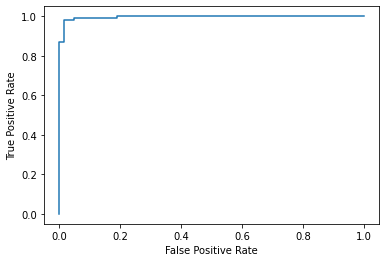

In [93]:
# ROC curve plotting
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.* Therefore, this visualization supports previous his AUC score. Model is very good at classification

# Binary set: Grid search and max_depth optimization

5. With the binary dataset, you must carry out a grid search to optimize the max_depth
parameter of a random forest classifier.

In [94]:
# Data
# X_train,X_test,y_train,y_test

# Create classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X_train, y_train)

# Grid search
from sklearn.model_selection import GridSearchCV, cross_val_score

# estimator.get_params().keys()
params = {
  # 'bootstrap': [True, False], #method for sampling data points (with or without replacement)
  'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], #max number of levels in each decision tree
  # 'max_features': ['auto', 'sqrt'], #nr of features considered while splitting
  # 'min_samples_leaf': [1, 2, 4], #min number of data points allowed in a leaf node
  # 'min_samples_split': [2, 5, 10], #min number of data points placed in a node before the node is split
  # 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], #number of trees in the forest
}

clf = GridSearchCV(estimator=rf_clf, param_grid=params, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                       40, 50, 60, 70, 80, 90, 100, None]})

In [95]:
clf.best_params_

{'max_depth': 7}

Considering remaining parameters to be default, best *max_dept* is equal to **7**

# Binary set: cross validated score for grid search

6. Finally, you must measure with a cross validated score the prediction performance of
the optimized estimator obtained in step 5. Use 10-fold cross-validation for such
measurement. Please visit:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [96]:
from sklearn.model_selection import cross_val_score

clf_best = clf.best_estimator_
scores = cross_val_score(clf_best, X_train, y_train, cv=10)
mean(scores)

0.9573717948717948

Value of the score for the best tree depth parameter is ***~0.957***

!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Jakub Maciazek - ModelSelection.ipynb')